# Loading Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('student_scores.csv')

# EDA

In [3]:
dataset.shape

(25, 2)

In [4]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0.5, 1.0, 'Hours vs Percentage')

Text(0.5, 0, 'Hours Studied')

Text(0, 0.5, 'Percentage Score')

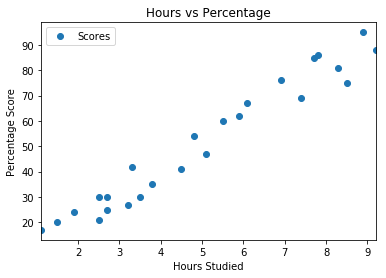

In [6]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

# Preparing the data

In [18]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
X
y

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the Algorithm

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
print(regressor.intercept_)

2.018160041434683


In [11]:
# Coefficient of X
print(regressor.coef_)

[9.91065648]


This means that for every one unit of change in hours studied, the change in the score is about 9.91%. Or in simpler words, if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously.

# Making Predictions

In [12]:
y_pred = regressor.predict(X_test)
y_test
y_pred

array([20, 27, 69, 30, 62], dtype=int64)

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [13]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Evaluating the Algorithm

In [14]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


You can see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a decent job.

In [15]:
regressor.score(X_train, y_train)

0.9515510725211553

95.14% accuracy

# Plot our results

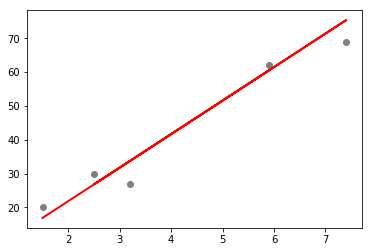

In [16]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()